In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
sys.path.append('../')


from src_experiment import get_new_data
from src_experiment import NeuralNet, train_model_multiclass
from visualization import plot_training
import geobin as gb

In [2]:
save_for_epochs = [0,50]

In [3]:
import time
def find_counts(state_dicts, data):
    # trees = {} # Dict to store trees. Epoch number as keys

    ncounts_per_epoch = {}
    
    # Main loop:
    # Iterate through epochs
    #   1. Load the state dict
    #   2. Generate the tree object
    #   3. Save tree to 
    
    for epoch, state_dict in state_dicts.items():
        start = time.time()
        # Initialize tree
        tree = gb.RegionTree(state_dict)
        # Build tree
        tree.build_tree(verbose=True)
        # trees[epoch] = tree
        
        
        # Pass data through tree
        tree.pass_dataloader_through_tree(data)
        # Find number counts
        
        tree.collect_number_counts()
        ncounts = tree.get_number_counts()
        ncounts_per_epoch[epoch] = ncounts
        end = time.time()
        dur = end - start
        print("----------------------------------------------------")
        print(f"Duration of ncounts for epoch {epoch}: {dur:.3f} s")
        print("----------------------------------------------------")
        
    return ncounts_per_epoch

def print_counts_info(counts, tot):
    # print(counts[0])
    # print(counts[50])
    l1_0 = counts[0][counts[0]["layer_idx"]==1]["total"].sum()
    l2_0 = counts[0][counts[0]["layer_idx"]==2]["total"].sum()
    l3_0 = counts[0][counts[0]["layer_idx"]==3]["total"].sum()
    l4_0 = counts[0][counts[0]["layer_idx"]==4]["total"].sum()

    l1_50 = counts[50][counts[50]["layer_idx"]==1]["total"].sum()
    l2_50 = counts[50][counts[50]["layer_idx"]==2]["total"].sum()
    l3_50 = counts[50][counts[50]["layer_idx"]==3]["total"].sum()
    l4_50 = counts[50][counts[50]["layer_idx"]==4]["total"].sum()

    print(f"\nTotal points passed through: {tot}")
    print(f"Total number of points for epoch 0:\nLayer 1: {l1_0}\nLayer 2: {l2_0}\nLayer 3: {l3_0}\nLayer 4: {l4_0}")
    print(f"Total number of points for epoch 50:\nLayer 1: {l1_50}\nLayer 2: {l2_50}\nLayer 3: {l3_50}\nLayer 4: {l4_50}")

# Two Moons data (Moons)

Input size: 2, Number of classes: 2


Training not saved.


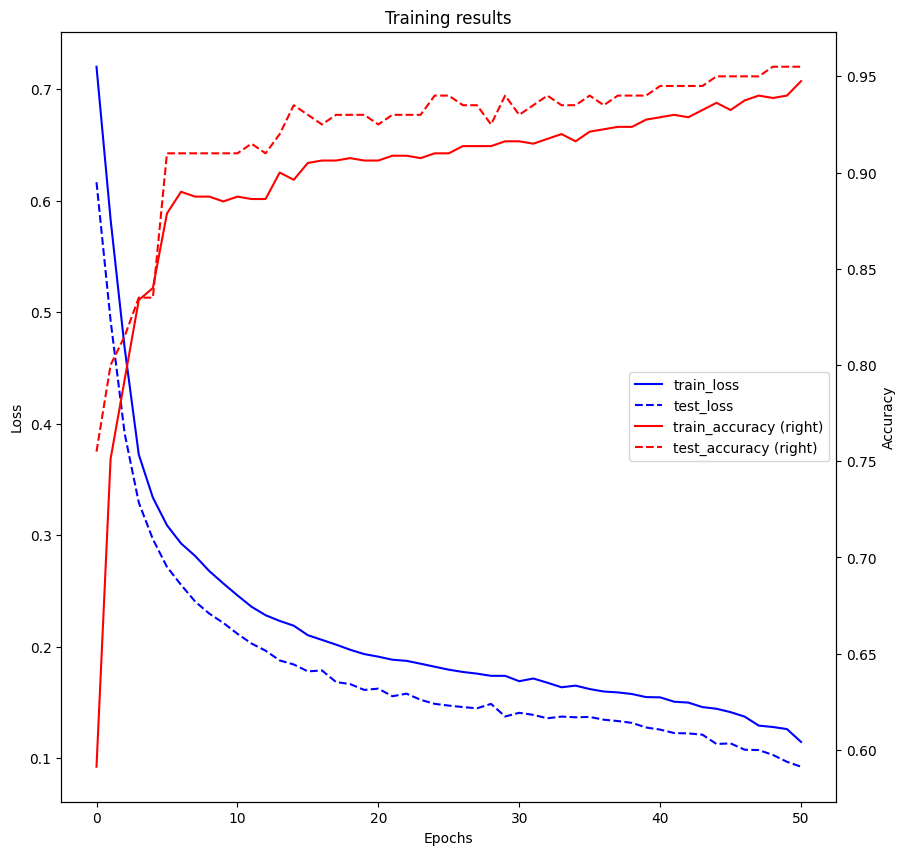

Building tree...


Layer 5: 100%|██████████| 4/4 [01:21<00:00, 20.39s/it]


----------------------------------------------------
Duration of ncounts for epoch 0: 110.884 s
----------------------------------------------------
Building tree...


Layer 5: 100%|██████████| 4/4 [01:21<00:00, 20.27s/it]


----------------------------------------------------
Duration of ncounts for epoch 50: 113.282 s
----------------------------------------------------


In [4]:
# Params
data_label_noise = 0.0
dropout = 0.0
run_number = 0

train_data, test_data = get_new_data("moons", noise=data_label_noise)

# Assuming train_data is a DataLoader
x_batch, y_batch = next(iter(train_data))
input_size = x_batch.shape[1]

all_train_labels = torch.cat([y for _, y in train_data])
num_classes = len(torch.unique(all_train_labels))

print(f"Input size: {input_size}, Number of classes: {num_classes}")


Net = NeuralNet(
    input_size=input_size,
    hidden_sizes=[5,5,5,5],
    num_classes=num_classes,
    dropout=dropout,
    seed=run_number,
)
res, state_dicts = train_model_multiclass(Net, train_data, test_data, epochs=51, save_for_epochs=save_for_epochs, RETURN_STATES=True)
plot_training(res)
counts = find_counts(state_dicts, test_data)

In [5]:
print_counts_info(counts, tot=len(test_data.dataset))


Total points passed through: 200
Total number of points for epoch 0:
Layer 1: 200.0
Layer 2: 200.0
Layer 3: 200.0
Layer 4: 200.0
Total number of points for epoch 50:
Layer 1: 200.0
Layer 2: 200.0
Layer 3: 200.0
Layer 4: 200.0


# Wisconsin Breast Cancer data (WBC)

Input size: 30, Number of classes: 2


Training not saved.


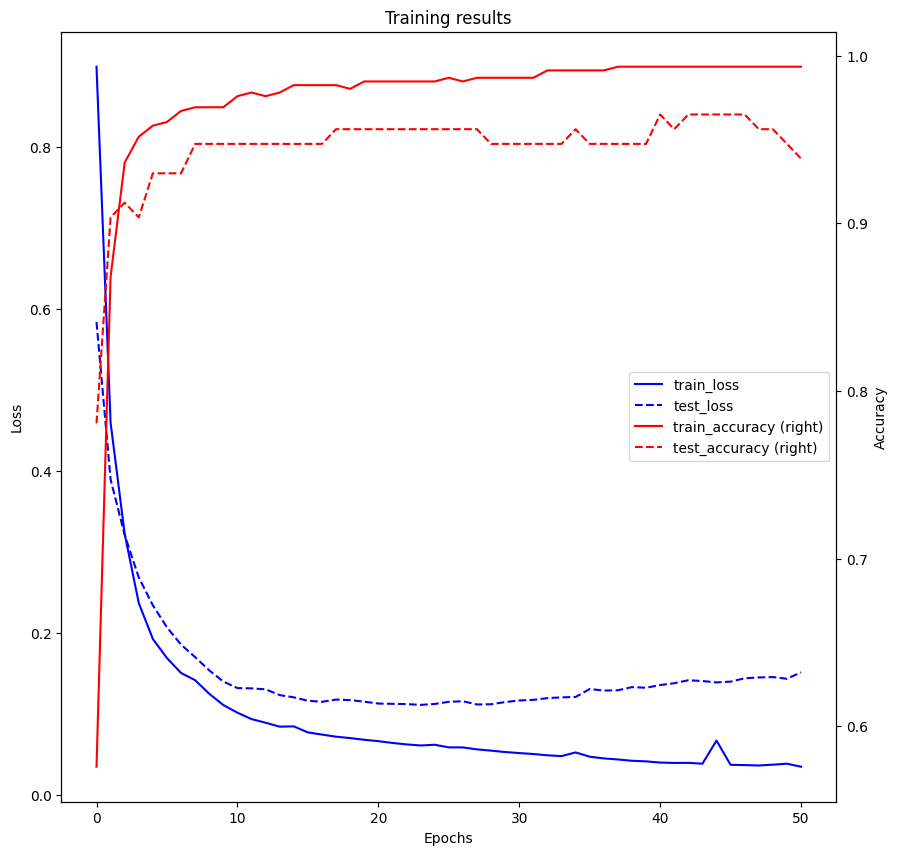

Building tree...


Layer 4: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


----------------------------------------------------
Duration of ncounts for epoch 0: 3.506 s
----------------------------------------------------
Building tree...


Layer 4: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]


----------------------------------------------------
Duration of ncounts for epoch 50: 3.462 s
----------------------------------------------------


In [6]:
# Params
data_label_noise = 0.0
dropout = 0.0
run_number = 5

train_data, test_data = get_new_data("wbc", noise=data_label_noise)


# Assuming train_data is a DataLoader
x_batch, y_batch = next(iter(train_data))
input_size = x_batch.shape[1]

all_train_labels = torch.cat([y for _, y in train_data])
num_classes = len(torch.unique(all_train_labels))

print(f"Input size: {input_size}, Number of classes: {num_classes}")

Net = NeuralNet(
    input_size=input_size,
    hidden_sizes=[5,5,5],
    num_classes=num_classes,
    dropout=dropout,
    seed=run_number,
)
res, state_dicts = train_model_multiclass(Net, train_data, test_data, epochs=51, save_for_epochs=save_for_epochs, RETURN_STATES=True)
plot_training(res)
counts = find_counts(state_dicts, test_data)

In [7]:
print_counts_info(counts, tot=len(test_data.dataset))


Total points passed through: 114
Total number of points for epoch 0:
Layer 1: 114.0
Layer 2: 114.0
Layer 3: 114.0
Layer 4: 114.0
Total number of points for epoch 50:
Layer 1: 114.0
Layer 2: 114.0
Layer 3: 114.0
Layer 4: 114.0


# Wine Origin data (Wine)

Input size: 13, Number of classes: 3


Training not saved.


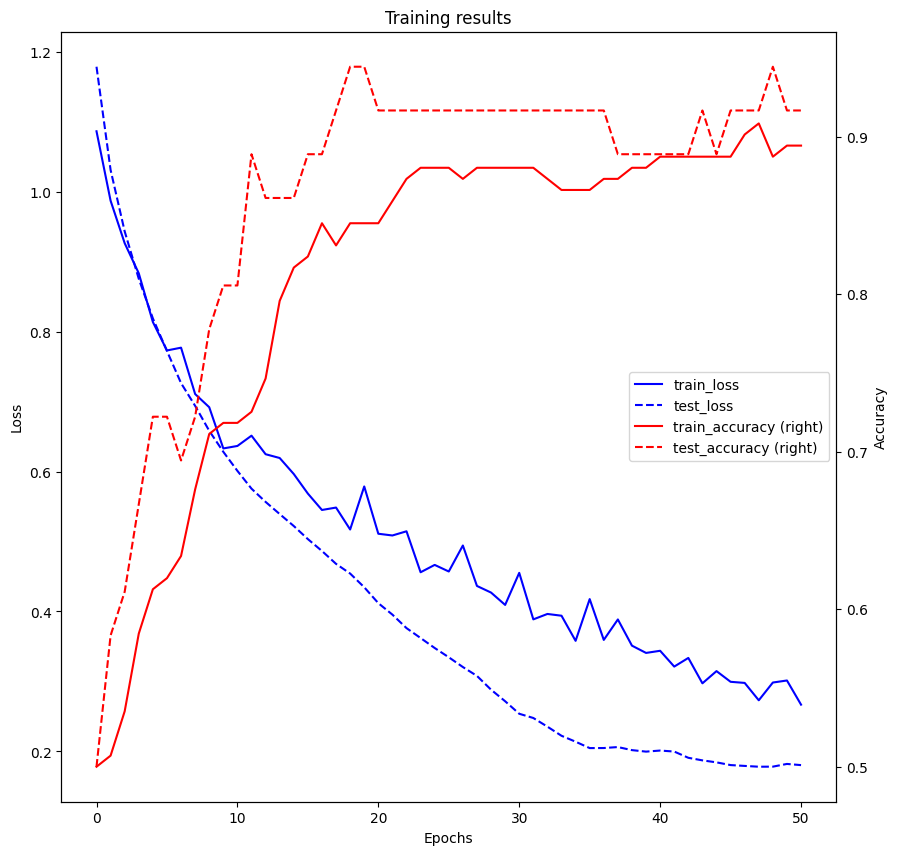

Building tree...


Layer 4: 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


----------------------------------------------------
Duration of ncounts for epoch 0: 10.630 s
----------------------------------------------------
Building tree...


Layer 4: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


----------------------------------------------------
Duration of ncounts for epoch 50: 6.576 s
----------------------------------------------------


In [8]:
data_label_noise = 0.1
dropout = 0.0
run_number = 0

train_data, test_data = get_new_data("wine", noise=data_label_noise)


# Assuming train_data is a DataLoader
x_batch, y_batch = next(iter(train_data))
input_size = x_batch.shape[1]

all_train_labels = torch.cat([y for _, y in train_data])
num_classes = len(torch.unique(all_train_labels))

print(f"Input size: {input_size}, Number of classes: {num_classes}")


Net = NeuralNet(
    input_size=input_size,
    hidden_sizes=[5,5,5],
    num_classes=num_classes,
    dropout=dropout,
    seed=run_number,
)
res, state_dicts = train_model_multiclass(Net, train_data, test_data, epochs=51, save_for_epochs=save_for_epochs, RETURN_STATES=True)
plot_training(res)
counts = find_counts(state_dicts, test_data)

In [9]:
print_counts_info(counts, tot=len(test_data.dataset))


Total points passed through: 36
Total number of points for epoch 0:
Layer 1: 36.0
Layer 2: 36.0
Layer 3: 36.0
Layer 4: 36.0
Total number of points for epoch 50:
Layer 1: 36.0
Layer 2: 36.0
Layer 3: 36.0
Layer 4: 36.0


# Heart Disease data (HD)

Input size: 13, Number of classes: 5


Training not saved.


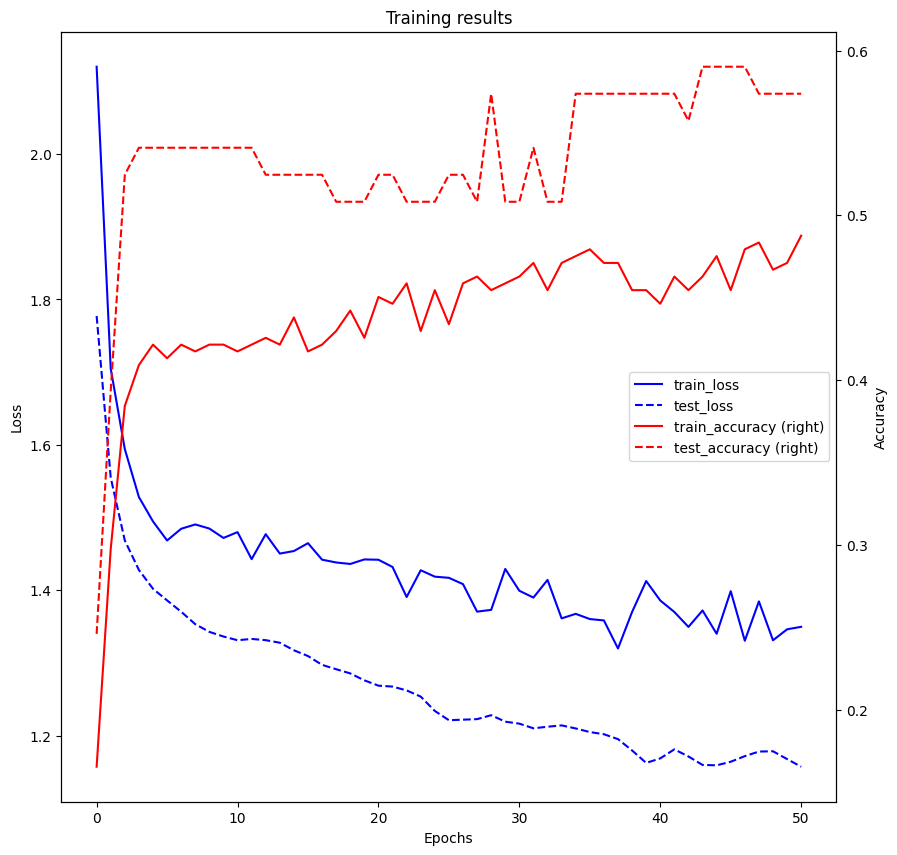

Building tree...


Layer 4: 100%|██████████| 32/32 [00:21<00:00,  1.50it/s]


----------------------------------------------------
Duration of ncounts for epoch 0: 23.425 s
----------------------------------------------------
Building tree...


Layer 4: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]


----------------------------------------------------
Duration of ncounts for epoch 50: 24.070 s
----------------------------------------------------


In [10]:
data_label_noise = 0.3
dropout = 0.2
run_number = 0

train_data, test_data = get_new_data("hd", noise=data_label_noise)


# Assuming train_data is a DataLoader
x_batch, y_batch = next(iter(train_data))
input_size = x_batch.shape[1]

all_train_labels = torch.cat([y for _, y in train_data])
num_classes = len(torch.unique(all_train_labels))

print(f"Input size: {input_size}, Number of classes: {num_classes}")


Net = NeuralNet(
    input_size=input_size,
    hidden_sizes=[5,5,5],
    num_classes=num_classes,
    dropout=dropout,
    seed=run_number,
)
res, state_dicts = train_model_multiclass(Net, train_data, test_data, epochs=51, save_for_epochs=save_for_epochs, RETURN_STATES=True)
plot_training(res)
counts = find_counts(state_dicts, test_data)

In [11]:
print_counts_info(counts, tot=len(test_data.dataset))


Total points passed through: 61
Total number of points for epoch 0:
Layer 1: 61.0
Layer 2: 61.0
Layer 3: 61.0
Layer 4: 61.0
Total number of points for epoch 50:
Layer 1: 61.0
Layer 2: 61.0
Layer 3: 61.0
Layer 4: 61.0


# Car Evaluation Data (Car)

Input size: 6, Number of classes: 4


Training not saved.


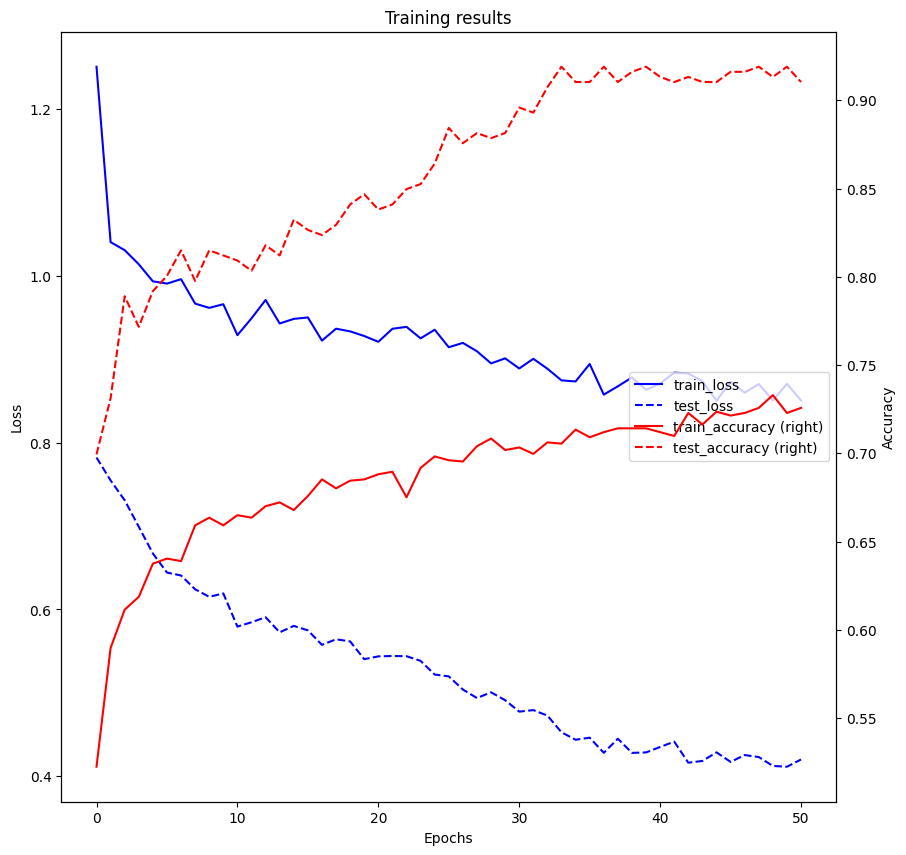

Building tree...


Layer 4: 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]


----------------------------------------------------
Duration of ncounts for epoch 0: 13.130 s
----------------------------------------------------
Building tree...


Layer 4: 100%|██████████| 16/16 [00:10<00:00,  1.46it/s]


----------------------------------------------------
Duration of ncounts for epoch 50: 12.423 s
----------------------------------------------------


In [12]:
# Params
data_label_noise = 0.2
dropout = 0.1
run_number = 0

train_data, test_data = get_new_data("car", noise=data_label_noise)


# Assuming train_data is a DataLoader
x_batch, y_batch = next(iter(train_data))
input_size = x_batch.shape[1]

all_train_labels = torch.cat([y for _, y in train_data])
num_classes = len(torch.unique(all_train_labels))

print(f"Input size: {input_size}, Number of classes: {num_classes}")


Net = NeuralNet(
    input_size=input_size,
    hidden_sizes=[5,5,5],
    num_classes=num_classes,
    dropout=dropout,
    seed=run_number,
)
res, state_dicts = train_model_multiclass(Net, train_data, test_data, epochs=51, save_for_epochs=save_for_epochs, RETURN_STATES=True)
plot_training(res)
counts = find_counts(state_dicts, test_data)

In [13]:
print_counts_info(counts, tot=len(test_data.dataset))


Total points passed through: 346
Total number of points for epoch 0:
Layer 1: 346.0
Layer 2: 346.0
Layer 3: 346.0
Layer 4: 346.0
Total number of points for epoch 50:
Layer 1: 346.0
Layer 2: 346.0
Layer 3: 346.0
Layer 4: 346.0
